In [1]:
import scanpy as sc
import os
import warnings
warnings.filterwarnings("ignore")
import sys
import PROST
PROST.__version__

' 1.1.2 '

In [2]:
# Set seed
SEED = 818
PROST.setup_seed(SEED)

#%% Read in data
section_num = 151672

# Set directory (If you want to use additional data, please change the file path)
rootdir = 'datasets/DLPFC'

input_dir = os.path.join(f'{rootdir}', str(section_num))
spatial_dir = os.path.join(f'{rootdir}', str(section_num),  'spatial')
output_dir = os.path.join(f'{rootdir}', str(section_num),   'results')
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [3]:
#%%
# Read data
adata = sc.read_visium(path=input_dir, count_file='{}_filtered_feature_bc_matrix.h5'.format(section_num))
adata.var_names_make_unique()

# Calculate PI
adata = PROST.prepare_for_PI(adata, platform="visium")
adata = PROST.cal_PI(adata, platform="visium")

# Spatial autocorrelation test
PROST.spatial_autocorrelation(adata, k=10, permutations=999, multiprocess=True)

# Save PI result
adata.write_h5ad(output_dir+"/PI_result.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.



Filtering genes ...

Calculating image index 1D:


100%|███████████████████████████████████████████████████████████████████████████| 4015/4015 [00:00<00:00, 77192.71it/s]
Trying to set attribute `.var` of view, copying.



Normalization to each gene:


100%|███████████████████████████████████████████████████████████████████████████| 5083/5083 [00:00<00:00, 14772.42it/s]



Gaussian filtering for each gene:


100%|██████████████████████████████████████████████████████████████████████████████| 5083/5083 [01:10<00:00, 72.20it/s]



Binary segmentation for each gene:


100%|██████████████████████████████████████████████████████████████████████████████| 5083/5083 [03:46<00:00, 22.47it/s]



Spliting subregions for each gene:


100%|██████████████████████████████████████████████████████████████████████████████| 5083/5083 [01:16<00:00, 66.56it/s]



Computing PROST Index for each gene:


100%|████████████████████████████████████████████████████████████████████████████| 5083/5083 [00:03<00:00, 1517.88it/s]



PROST Index calculation completed !!


100%|██████████████████████████████████████████████████████████████████████████████| 5083/5083 [16:07<00:00,  5.25it/s]
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [4]:
#%% Pre-process
# Read PI result
adata = sc.read(output_dir+"/PI_result.h5")

# Remove MT-gene
drop_gene_name = "MT-"
selected_gene_name = list(adata.var_names[adata.var_names.str.contains("MT-") == False])
adata = PROST.feature_selection(adata, selected_gene_name = selected_gene_name)
adata

View of AnnData object with n_obs × n_vars = 4015 × 5070
    obs: 'in_tissue', 'array_row', 'array_col', 'image_idx_1d'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'SEP', 'SIG', 'PI', 'Moran_I', 'Geary_C', 'p_norm', 'p_rand', 'fdr_norm', 'fdr_rand', 'selected'
    uns: 'binary_image', 'del_index', 'gau_fea', 'locates', 'nor_counts', 'spatial', 'subregions'
    obsm: 'spatial'

In [5]:
# Sort PI in descending order
PI_result = adata.var[['SEP','SIG','PI','fdr_rand']]
PI_sort = PI_result.sort_values(by="PI", ascending=False)


Drawing pictures:


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.15it/s]



Drawing completed !!


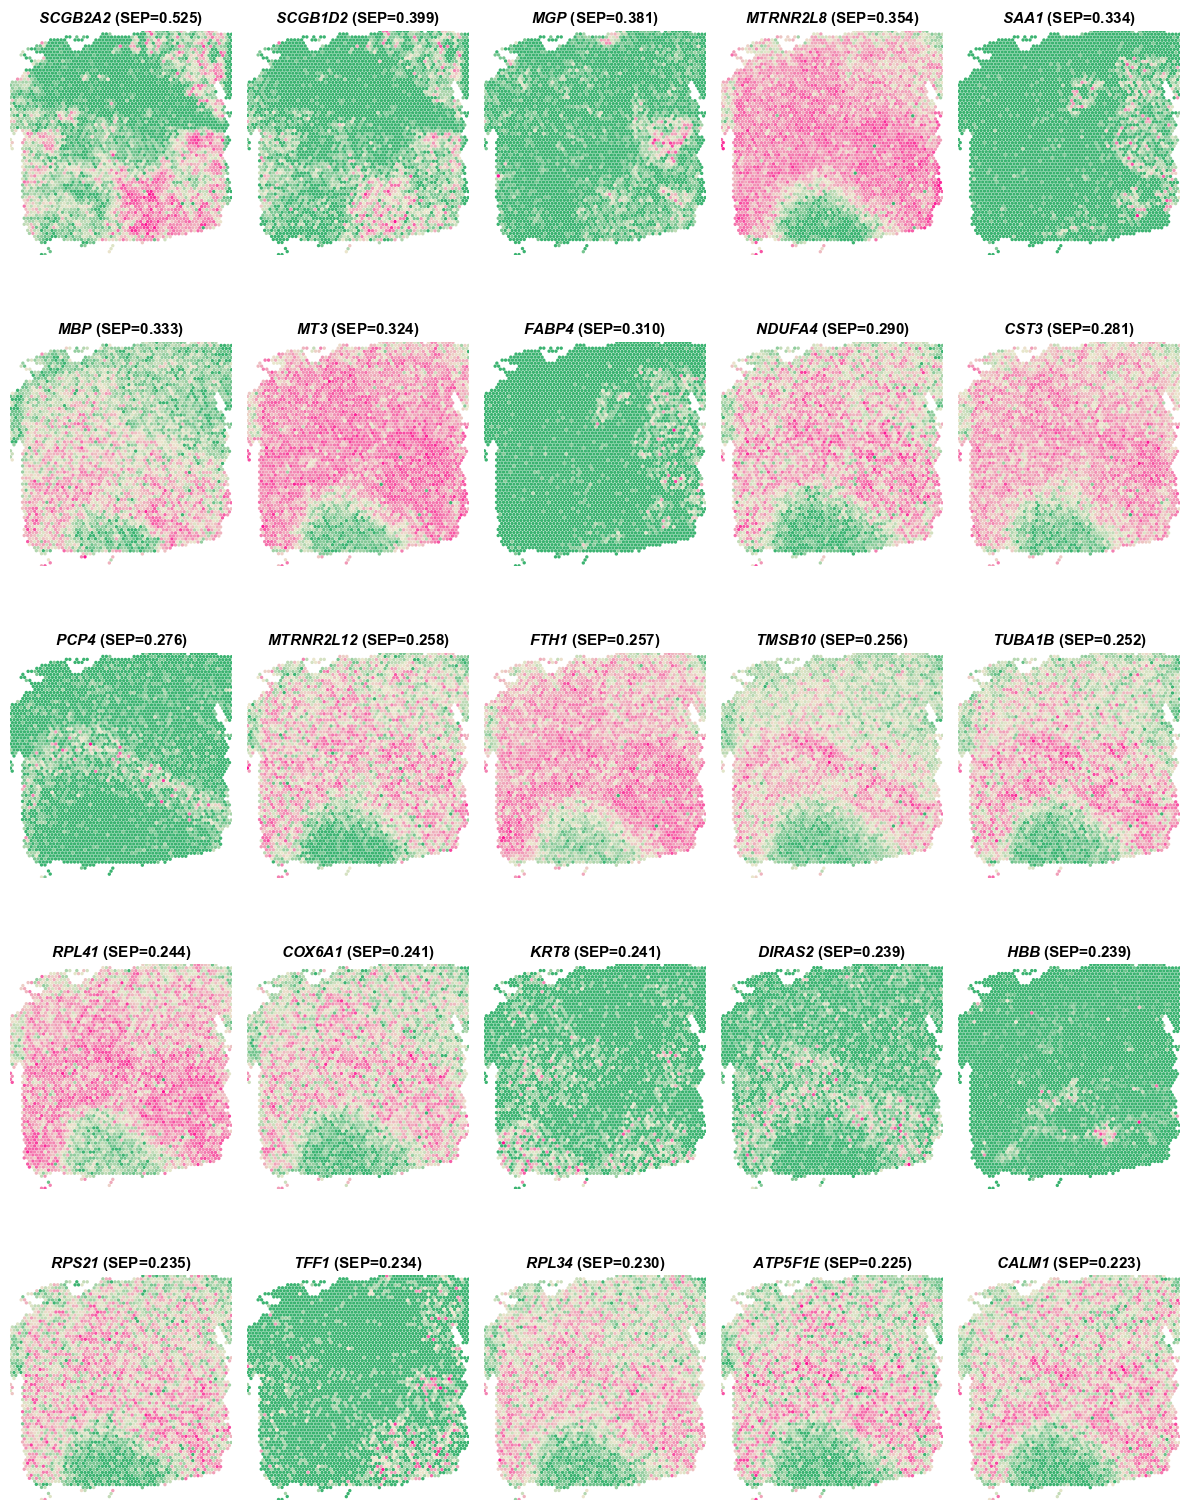

In [6]:
# Plot genes in descending order of Separability
PROST.plot_gene(adata, platform="visium", sorted_by="SEP", top_n=25, size=2)


Drawing pictures:


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]



Drawing completed !!


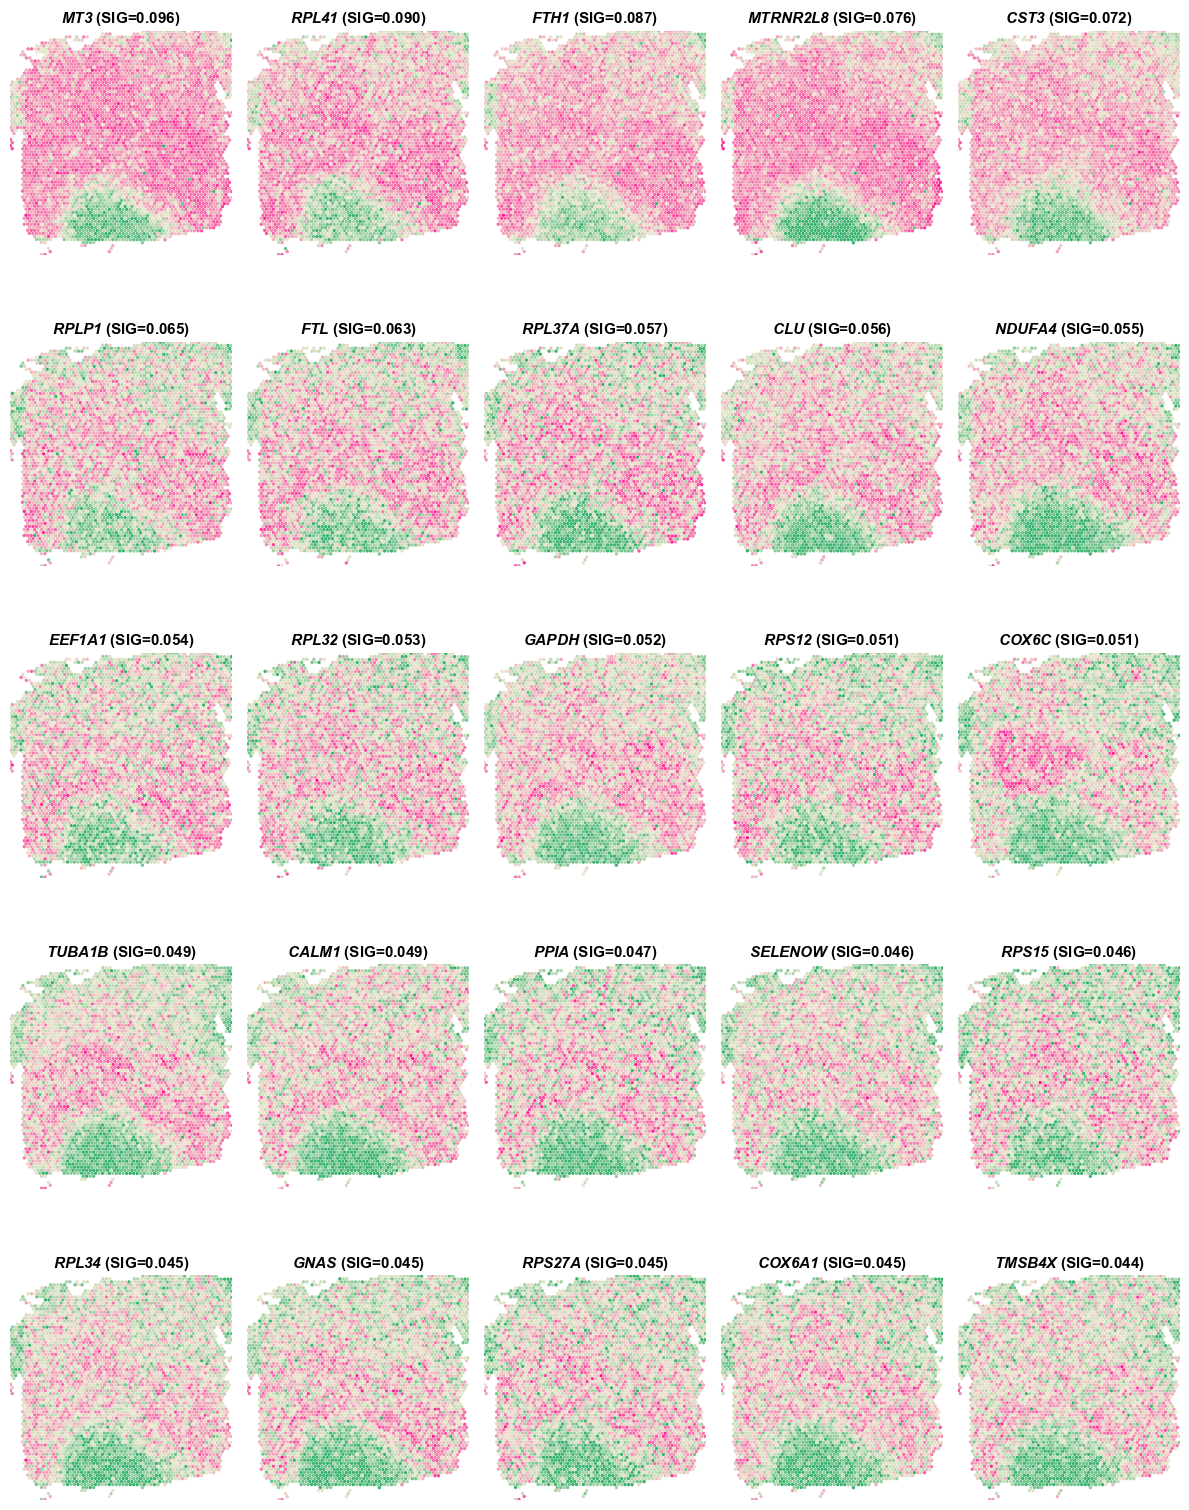

In [7]:
# Plot genes in descending order of Significance
PROST.plot_gene(adata, platform="visium", sorted_by="SIG", top_n=25, size=2)


Drawing pictures:


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]



Drawing completed !!


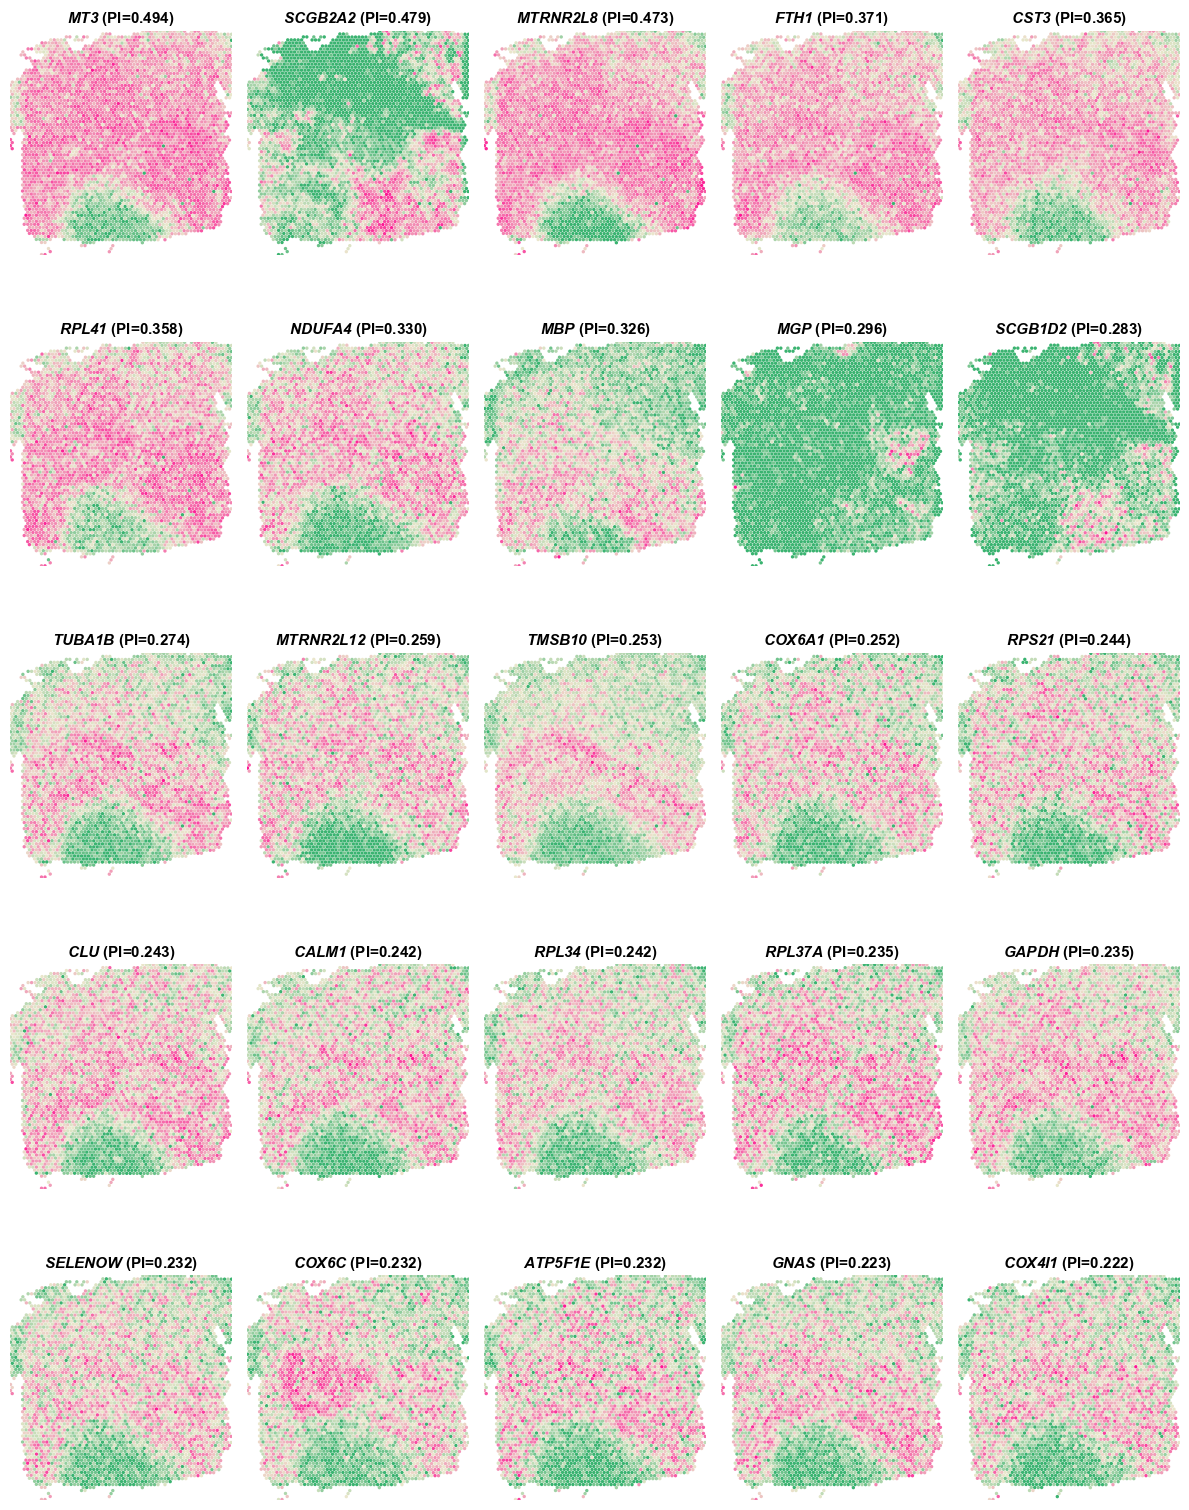

In [8]:
# Plot genes in descending order of PI
PROST.plot_gene(adata, platform="visium", sorted_by="PI", top_n=25, size=2)